# ------------------------------Elon Musk Tweets----------------------------------

In [1]:
cd C:\Users\TANMAYA SAHU\Downloads\Data sci project\elon musk

C:\Users\TANMAYA SAHU\Downloads\Data sci project\elon musk


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("elon_musk_tweets.csv")
data.head(5)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [4]:
data.tail(5)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
2663,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just that manganese is an alternative to iron ...
2664,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly
2665,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies are directly responsible for the...
2666,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You should be voted out of office
2667,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09,CB radios are free from govt/media control


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweets          2668 non-null   object
 1   Retweets        2668 non-null   int64 
 2   Likes           2668 non-null   int64 
 3   Date            2668 non-null   object
 4   Cleaned_Tweets  2668 non-null   object
dtypes: int64(2), object(3)
memory usage: 104.3+ KB


In [6]:
data.isnull().sum()

Tweets            0
Retweets          0
Likes             0
Date              0
Cleaned_Tweets    0
dtype: int64

In [7]:
data.dtypes

Tweets            object
Retweets           int64
Likes              int64
Date              object
Cleaned_Tweets    object
dtype: object

In [8]:
data.shape

(2668, 5)

In [9]:
data.describe(include='all')

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
count,2668,2668.000000,2.668000e+03,2668,2668
unique,2642,NaN,NaN,2668,2382
top,@PPathole Exactly,NaN,NaN,2022-10-27 16:17:39,Yes
freq,4,NaN,NaN,1,46
mean,NaN,5598.058096,6.760142e+04,NaN,NaN
std,NaN,21788.655734,1.955568e+05,NaN,NaN
min,NaN,41.000000,9.330000e+02,NaN,NaN
25%,NaN,332.000000,6.240000e+03,NaN,NaN
50%,NaN,847.500000,1.559150e+04,NaN,NaN
75%,NaN,3366.250000,5.577650e+04,NaN,NaN


In [10]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

tweets = data['Cleaned_Tweets'].tolist()

# Load the sentiment analysis pipeline with a PyTorch model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, framework='pt')

# Get sentiment labels for each tweet
results = sentiment_analyzer(tweets)

# Extract sentiment labels and probabilities
sentiments = [result['label'] for result in results]
probabilities = [result['score'] for result in results]

# Add the sentiment labels and probabilities to the DataFrame
data['Sentiment'] = sentiments
data['Sentiment_Probability'] = probabilities

# Display the updated DataFrame
print(data.head())

                                              Tweets  Retweets    Likes  \
0                              @PeterSchiff 🤣 thanks       209     7021   
1                              @ZubyMusic Absolutely       755    26737   
2   Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927   356623   
3     Meeting a lot of cool people at Twitter today!      9366   195546   
4  Entering Twitter HQ – let that sink in! https:...    145520  1043592   

                  Date                                  Cleaned_Tweets  \
0  2022-10-27 16:17:39                                          thanks   
1  2022-10-27 13:19:25                                      Absolutely   
2  2022-10-27 13:08:00                        Dear Twitter Advertisers   
3  2022-10-26 21:39:32  Meeting a lot of cool people at Twitter today!   
4  2022-10-26 18:45:58         Entering Twitter HQ – let that sink in!   

  Sentiment  Sentiment_Probability  
0  POSITIVE               0.999808  
1  POSITIVE               0.99

In [11]:
data['Sentiment']=data['Sentiment'].map({'POSITIVE':1,'NEGATIVE':0})

In [12]:
data.describe()

,Retweets,Likes,Sentiment,Sentiment_Probability
count,2668.000000,2.668000e+03,2668.000000,2668.000000
mean,5598.058096,6.760142e+04,0.545352,0.960575
std,21788.655734,1.955568e+05,0.498032,0.088226
min,41.000000,9.330000e+02,0.000000,0.501197
25%,332.000000,6.240000e+03,0.000000,0.977433
50%,847.500000,1.559150e+04,1.000000,0.996861
75%,3366.250000,5.577650e+04,1.000000,0.999425
max,681707.000000,4.780787e+06,1.000000,0.999890


In [13]:
data.corr()

,Retweets,Likes,Sentiment,Sentiment_Probability
Retweets,1.000000,0.954013,-0.054143,0.003975
Likes,0.954013,1.000000,-0.039419,0.003796
Sentiment,-0.054143,-0.039419,1.000000,0.024150
Sentiment_Probability,0.003975,0.003796,0.024150,1.000000


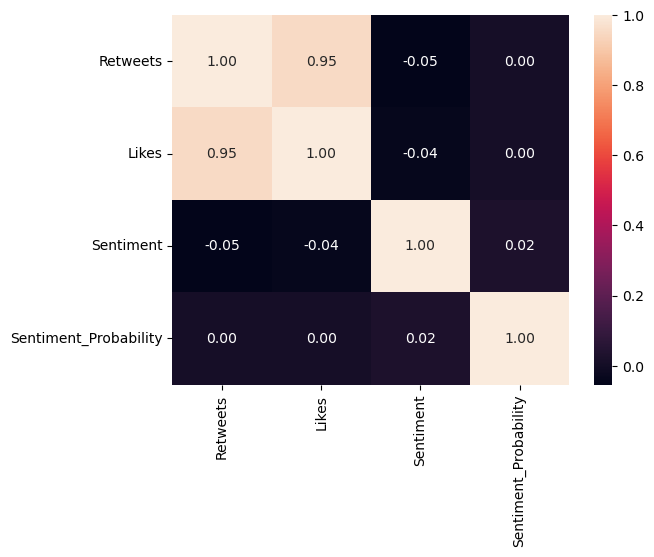

In [14]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

In [25]:
data['Sentiment'].value_counts()

1    1455
0    1213
Name: Sentiment, dtype: int64

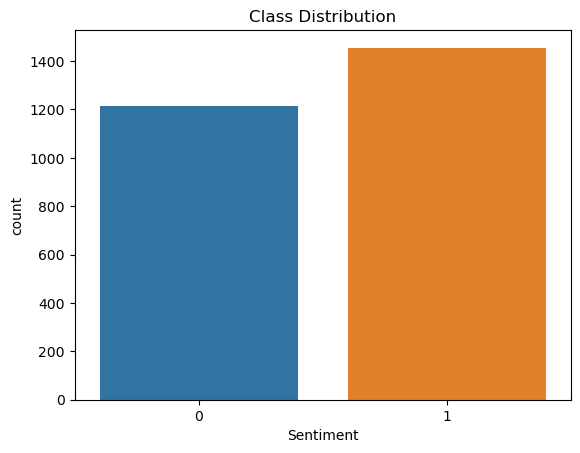

In [24]:
import seaborn as sns
sns.countplot(x='Sentiment', data=data)
plt.title('Class Distribution')
plt.show()


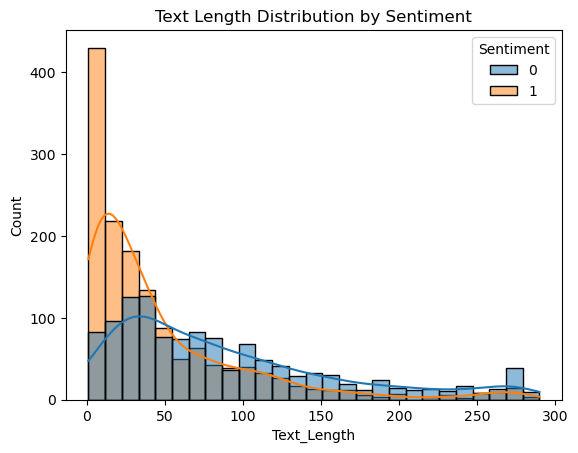

In [27]:
data['Text_Length'] = data['Cleaned_Tweets'].apply(len)
sns.histplot(data, x='Text_Length', hue='Sentiment', kde=True)
plt.title('Text Length Distribution by Sentiment')
plt.show()


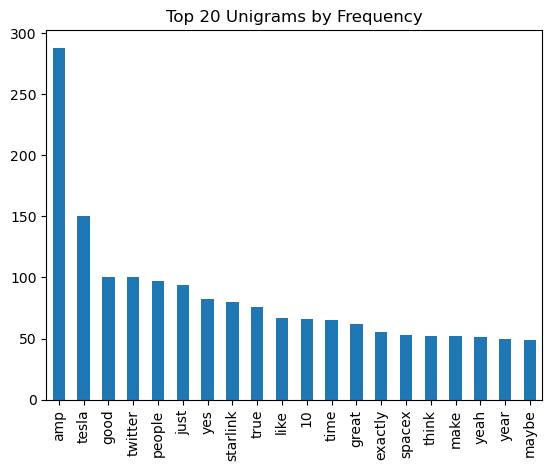

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for unigrams
unigram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
unigram_counts = unigram_vectorizer.fit_transform(data['Cleaned_Tweets'])

# Plot the most common unigrams
most_common_unigrams = pd.DataFrame(unigram_counts.sum(axis=0), columns=unigram_vectorizer.get_feature_names_out()).T.sort_values(0, ascending=False)
most_common_unigrams[:20].plot(kind='bar', legend=False)
plt.title('Top 20 Unigrams by Frequency')
plt.show()


In [15]:
data.head(2)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Sentiment,Sentiment_Probability
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,1,0.999808
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,1,0.999869


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data['Cleaned_Tweets']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7403245942571786
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       373
           1       0.76      0.76      0.76       428

    accuracy                           0.74       801
   macro avg       0.74      0.74      0.74       801
weighted avg       0.74      0.74      0.74       801



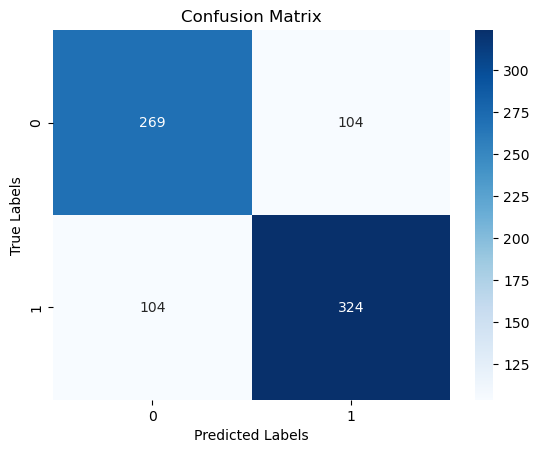

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

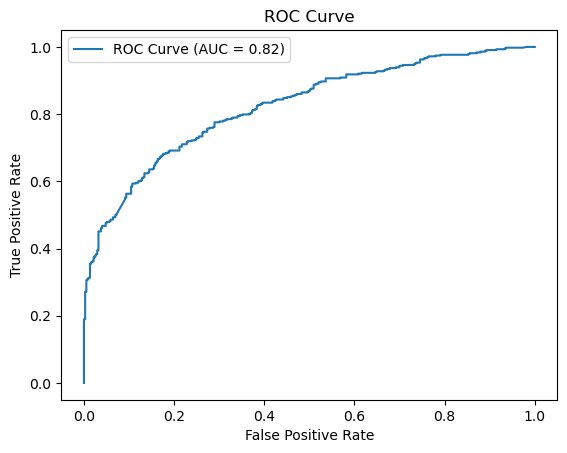

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


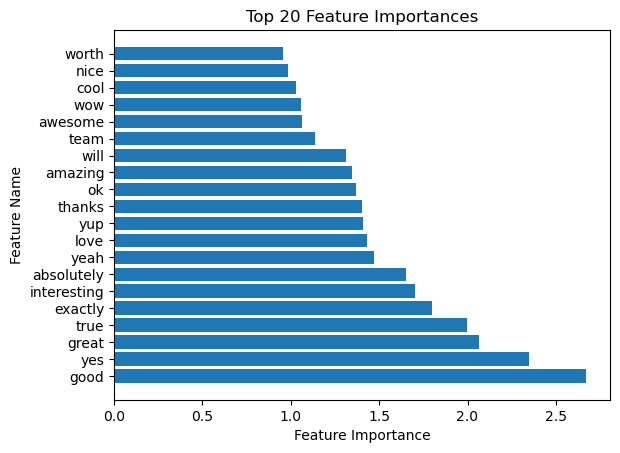

In [23]:
feature_importance = model.coef_[0]  # Assuming a linear model like Logistic Regression
feature_names = vectorizer.get_feature_names_out()

top_features = sorted(zip(feature_importance, feature_names), reverse=True)[:20]
top_importance, top_names = zip(*top_features)

plt.barh(range(len(top_names)), top_importance, align="center")
plt.yticks(range(len(top_names)), top_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 20 Feature Importances")
plt.show()
